<a href="https://colab.research.google.com/github/Hallymhwangbo/2020-AI_minseo/blob/master/04_3_xor_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XOR gate 이해하기

and gate의 가설로 실행 했을 때는 예측을 할 수 없음

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
#AND
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [3]:
X = tf.placeholder(tf.float32, [None, 2]) # none-> 데이터가 몇 개가 들어올 지는 모른다. 데이터의 차원은 2
Y = tf.placeholder(tf.float32, [None, 1])

In [4]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')#and gate에 사용된 가설은 xor에서 쓸 수 없었다.
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis_ori = tf.sigmoid(tf.matmul(X, W) + b)

In [5]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [6]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [7]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))#머신러닝이 예측한 것과 정답 비교 (정답=1 오답=0 --> 평균을 낸다) 

In [8]:
sess = tf.Session()

In [9]:
sess.run(tf.global_variables_initializer())

In [10]:
vcost =[]

In [11]:
for step in range(30001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0: 
        print(cost1)

0.6972015
0.6231758
0.4987903
0.43147343
0.39699376
0.37786984
0.36654103
0.35952973
0.35506833
0.35217905
0.35028747
0.34904063
0.34821475
0.34766677
0.34730208
0.34705925
0.34689757
0.34678948
0.34671766
0.3466696
0.3466376
0.34661633
0.34660238
0.34659317
0.34658688
0.346583
0.34658027
0.34657836
0.34657693
0.34657615
0.3465755


Text(0.5, 0, 'epoch')

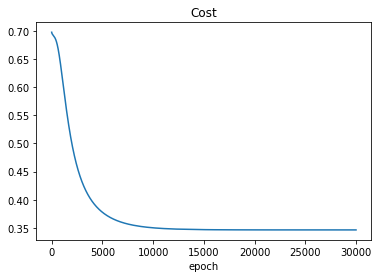

In [12]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [13]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]})
print(test1[0][0]) # 대괄호 안보이도록 하기 위해 [0][0]씀

0.4999981


In [14]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})
  print(i, x_data[i], y_data[i], "----predicted : ", test1)

0 [0. 0.] [0.] ----predicted :  [[9.0578664e-07]]
1 [0. 1.] [1.] ----predicted :  [[0.99999654]]
2 [1. 0.] [1.] ----predicted :  [[0.49999642]]
3 [1. 1.] [0.] ----predicted :  [[0.4999981]]


In [15]:
acc1 = sess.run(accuracy, feed_dict = {X: x_data, Y: y_data})
print(acc1)

0.75


In [16]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})